In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
np.random.seed(0)
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X[:,0] + np.random.randn(100)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

LinearRegression()

Simple LR coef: [2.9902591] intercept: 4.206340188711437
MSE: 0.9177532469714291
R²: 0.6521157503858556


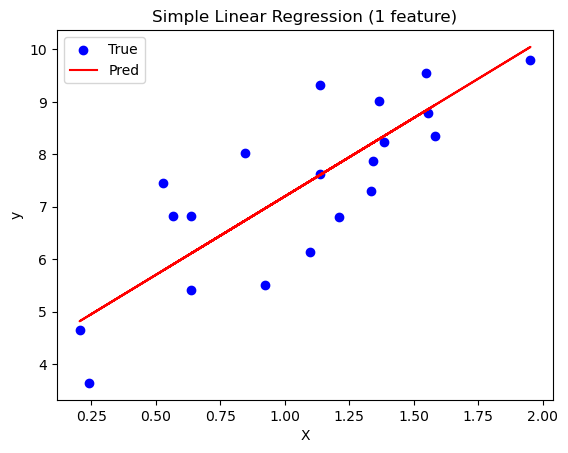

In [5]:
y_pred_simple = model_simple.predict(X_test)

print("Simple LR coef:", model_simple.coef_, "intercept:", model_simple.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred_simple))
print("R²:", r2_score(y_test, y_pred_simple))

plt.scatter(X_test, y_test, color='blue', label='True')
plt.plot(X_test, y_pred_simple, color='red', label='Pred')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression (1 feature)')
plt.legend()
plt.show()

In [6]:
try:
    from sklearn.datasets import load_boston
    boston = load_boston()
    df = pd.DataFrame(boston.data, columns=boston.feature_names)
    df['MEDV'] = boston.target
    print("Loaded Boston housing dataset (deprecated in newer versions)")
    target = 'MEDV'
    X_all = df.drop(columns=[target])
    y_all = df[target]
except Exception as e:
    # fallback to California housing
    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()
    df = pd.DataFrame(housing.data, columns=housing.feature_names)
    df['MedHouseValue'] = housing.target
    print("Using California housing dataset")
    target = 'MedHouseValue'
    X_all = df.drop(columns=[target])
    y_all = df[target]

print(df.head())

Using California housing dataset
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  


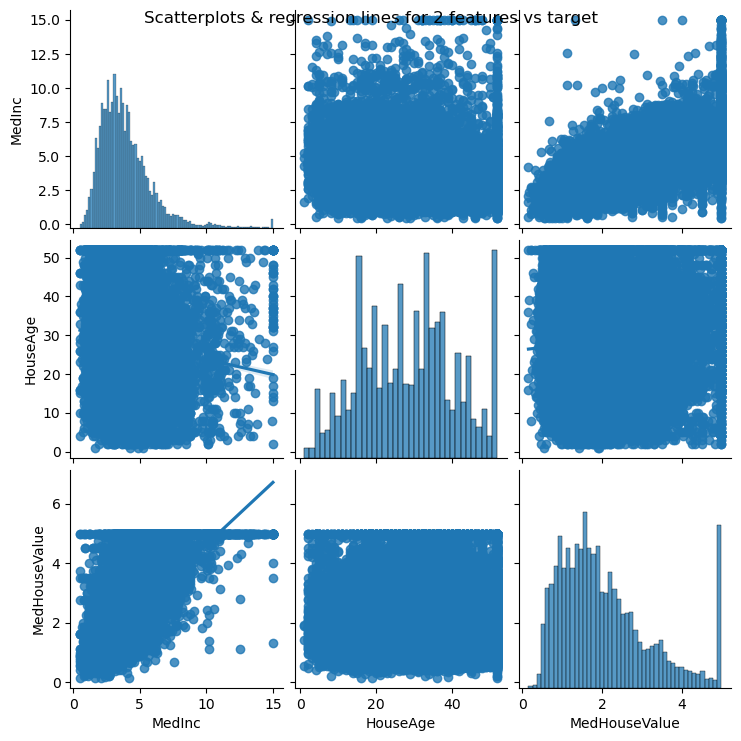

In [7]:
sns.pairplot(df, vars=list(X_all.columns[:2]) + [target], kind='reg', diag_kind='hist')
plt.suptitle('Scatterplots & regression lines for 2 features vs target')
plt.show()

In [8]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

In [9]:
model_multi = LinearRegression()
model_multi.fit(X_train2_scaled, y_train2)

y_pred2 = model_multi.predict(X_test2_scaled)

print("Multi‑linear regression coefficients:")
for feat, coef in zip(X_all.columns, model_multi.coef_):
    print(f"  {feat}: {coef:.4f}")
print("Intercept:", model_multi.intercept_)
print("MSE:", mean_squared_error(y_test2, y_pred2))
print("R²:", r2_score(y_test2, y_pred2))

Multi‑linear regression coefficients:
  MedInc: 0.8544
  HouseAge: 0.1225
  AveRooms: -0.2944
  AveBedrms: 0.3393
  Population: -0.0023
  AveOccup: -0.0408
  Latitude: -0.8969
  Longitude: -0.8698
Intercept: 2.0719469373788777
MSE: 0.5558915986952442
R²: 0.575787706032451


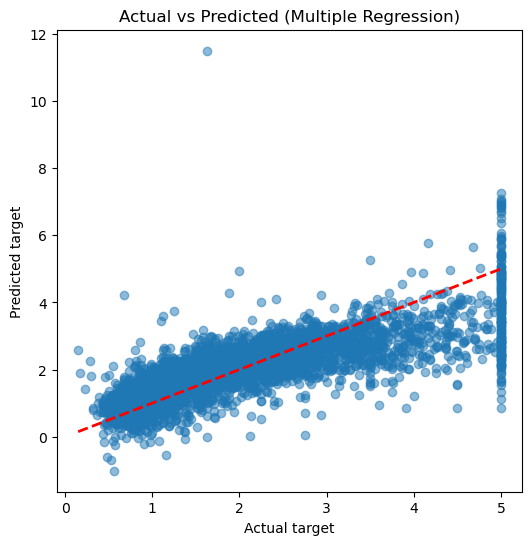

In [10]:
plt.figure(figsize=(6,6))
plt.scatter(y_test2, y_pred2, alpha=0.5)
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'r--', lw=2)
plt.xlabel('Actual target')
plt.ylabel('Predicted target')
plt.title('Actual vs Predicted (Multiple Regression)')
plt.show()